# Integralrechnung

Numerische Integration dient der näherungsweisen Berechnung von Integralen, insbesondere in folgenden Fällen:

- wenn keine analytische Stammfunktion existiert

- wenn die Funktion komplex ist oder nur als numerische Daten vorliegt

- wenn eine symbolische Integration nicht praktikabel oder zu aufwendig ist

# Mathematischer Hintergrund
## Satz (Riemann-Integrierbarkeit)
Eine Funktion $f: [a,b] \to \mathbb{R}$ ist *Riemann-Integrierbar*, wenn Sie beschränkt ist und die Ober- oder Untersumme im Grenzwert $n \to \infty$ gegen den gleichen Wert konvergieren:

$$\lim_{n \to \infty} U_n \leq \int_a^b f(x)\,dx \leq \lim_{n \to \infty} O_n$$

> Jede beschränkte auf $[a,b]$ stetige Funktion ist Riemann-integrierbar.
[1]
---

## Hinweise zu Definitionslücken und Nullstellen

- Ist $f(x)$ nicht überall definiert (z. B. $f(x) = \frac{1}{x}$), muss das Intervall angepasst oder eine uneigentliche Integration durchgeführt werden.
- Nullstellen sind kein Problem, solange $f(x)$ stetig ist.


In [1]:
from functions import *

def newton(self, start, end):
        '''
        Gibt die Nullstellen der Funktion numerisch wieder
        Hinweis:
        Alle Funktionen sind aus functions.py rauskopiert, um sie hier einmal vorzustellen.
        '''
        table = []
        nullstellen = []
        current = start

        step = abs(end - start) / 100
        while (current <= end):
            if self(current) == 0:
                nullstellen.append(current)
            
            elif self(current) * self(current + step) < 0:
                table.append(current)
            current += step

        if len(table) != 0:
            for ele in table:
                xn = ele - 1
                x0 = ele
                for l in range(31):
                    if self.derive()(x0) == 0: 
                        xn = x0 - self(x0)/(self.derive()(x0)+1e-5)
                    else:
                        xn = x0 - self(x0)/self.derive()(x0)
                    x0 = xn

                nullstellen.append(x0)
        
        nullstellen.sort()
        #print("Nullstellen:", nullstellen)
        return nullstellen

## Ziel: Flächeninhalt unter einer Funktion

Gegeben sei eine stetige Funktion $ f(x) $ und ein Intervall $ [a, b] $.
Das bestimmte Integral $ \int_a^b f(x)\,dx $ beschreibt den Flächeninhalt zwischen dem Graphen von $f$ und der x-Achse im Intervall $[a, b]$.

Beispiel:  
Für $ f(x) = \sin(x) $ und $ a = 0 $, $ b = \pi $ ergibt sich:

$\int_0^\pi \sin(x)\,dx$

Diese Fläche kann durch numerische Verfahren näherungsweise berechnet werden.

## Die Grundidee:
Um das Problem zu lösen, zerlegen wir das Intervall $[a,b]$ in $n$ Teilintervalle der Breite $\Delta x = \frac{b-a}{n}$. 

Die Kurve wird anschließend durch einfache geometrische Formen – meist Rechtecke oder Trapeze – angenähert.

Je größer die Anzahl 
${n}$
der Teilintervalle, desto genauer wird die Näherung des Integrals.
Auf diese Weise lässt sich auch die Fläche unter komplizierten Funktionen berechnen, für die keine geschlossene Stammfunktion existiert.

### Ablauf
1. Zerlegung des Intervalls in gleich breite Abschnitte; die Breite dieser Abschnitte wird mit $\Delta x$ bezeichnet. 
2. Flächeninhalt der einzelnen Teilabschnitte berechenen.
3. Aufsummieren der berechneten Flächeninhalte.
\
\
Hier gilt: Je mehr Abschnitte, desto genauer beschreibt die Summe den tatsächlichen Flächeninhalt zwischen der Funktion und der x-Achse.

## Methoden zur Unterteilung der Fläche

### Untersumme
Bei der Untersumme wird die Fläche unter der Kurve durch Rechtecke angenähert, deren Höhe dem jeweils kleinsten Funktionswert innerhalb eines Teilintervalls entspricht. Das bedeutet, dass jedes Rechteck unterhalb der Kurve liegt oder sie höchstens berührt.
\
\
Dadurch liefert die Untersumme stets eine untere Schranke für den tatsächlichen Flächeninhalt
\
\
$U_n = \sum_{i=0}^{n-1} f(x_i)\cdot \Delta x$

##### $\rightarrow$ Diese Funktion "unterschätzt" die Fläche
[2]

In [2]:
import math 

def _untersumme(self, start, end, n):
    sum = 0
    width = abs(start - end) / n
    for i in range(1, n+1):
        x = start + i * width
        if not math.isnan(self(x)):
            sum += min(self(x), self(x - width)) * width
    
    return abs(sum)

In [3]:
def untersumme(self, start, end, n = 10):
        '''
        Für die numerische Integration mit der Untersumme
        '''
        sum = 0
        nullstellen = self.newton(start, end)

        if len(nullstellen) == 0:
            return self._untersumme(start, end, n)

        for i, ele in enumerate(nullstellen):
            if ele != start and i == 0:
                sum += self._untersumme(start, ele, n)
            
            if i < len(nullstellen)-1:
                sum += self._untersumme(ele, nullstellen[i+1], n)
            else: 
                sum += self._untersumme(ele, end, n)

        return sum

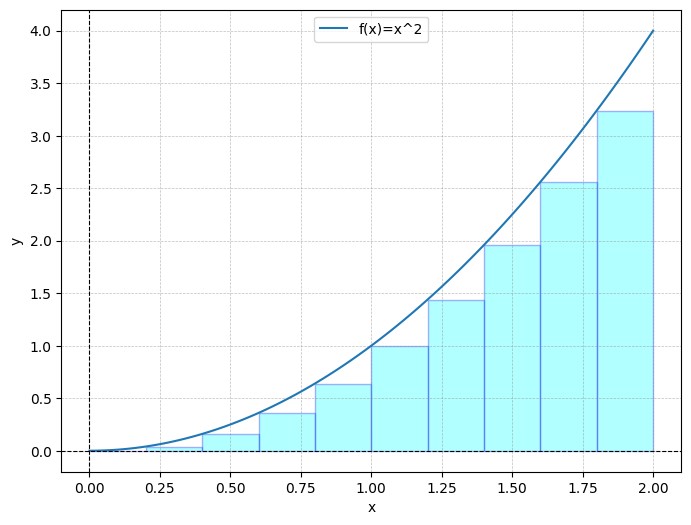

In [4]:
from functions import *

f = PowerFunc("f", 1, 2)

Plottable.multi_plot([f], 0, 2, 100, True, 10, mode = 0)

### Obersumme
Bei der Obersumme wird die Fläche unter der Kurve durch Rechtecke angenähert, deren Höhe dem jeweils größten Funktionswert innerhalb eines Teilintervalls entspricht. Jedes Rechteck liegt dabei oberhalb der Kurve oder schließt sie von oben ein. Dadurch ergibt sich eine obere Schranke.

$O_n = \sum_{i=0}^{n-1} f(x_i)\cdot \Delta$

##### $\rightarrow$ Diese Funktion "überschätzt" die Fläche
[2]

In [5]:
def _obersumme(self, start, end, n):
    sum = 0
    width = abs(start - end) / n
    for i in range(n):
        x = start + i * width
        if not math.isnan(self(x)):
            sum += max(self(x), self(x + width)) * width
    
    return abs(sum)

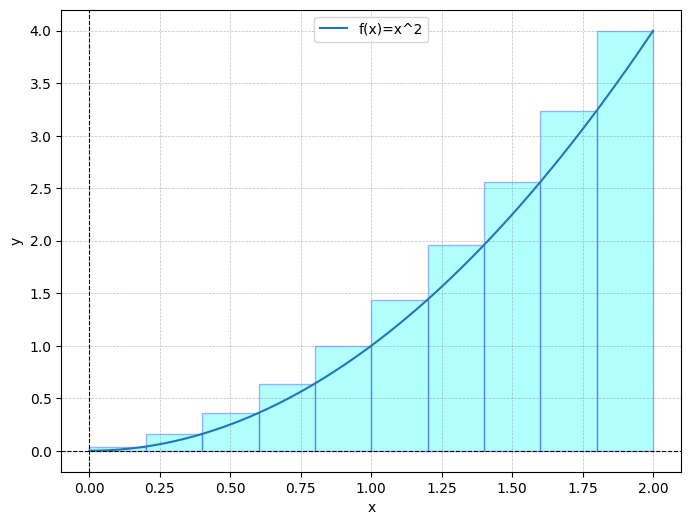

In [6]:
Plottable.multi_plot([f], 0, 2, 100, True, 10, mode = 1)

### Trapezregel
Bei der Trapezregel verwenden wir zur Flächenannäherung Trapeze anstelle von Rechtecken. Die linke und rechte Höhe jedes Trapezes entsprechen den Funktionswerten an den Randpunkten des jeweiligen Teilintervalls.
\
\
Durch die Berücksichtigung beider Randwerte entsteht eine bessere Anpassung an den Kurvenverlauf. Dadurch wird der Approximationsfehler deutlich reduziert

$T_n = \frac{\Delta x}{2}$ $\left[ f(x_0) + f(x_{n}) + 2\sum_{i=0}^{n-1} f(x_i)\right]$

##### $\rightarrow$ Nähert die Fläche genauer an


In [7]:
def _trapezregel(self, start, end, n):
        sum = 0
        width = abs(start - end) / n
        for i in range(n):
            x1 = start + i * width
            x2 = start + (i+1) * width
            if not (math.isnan(self(x1)) or math.isnan(self(x2))):
                sum += 0.5 * (self(x1) + self(x2)) * width
            
        return abs(sum)

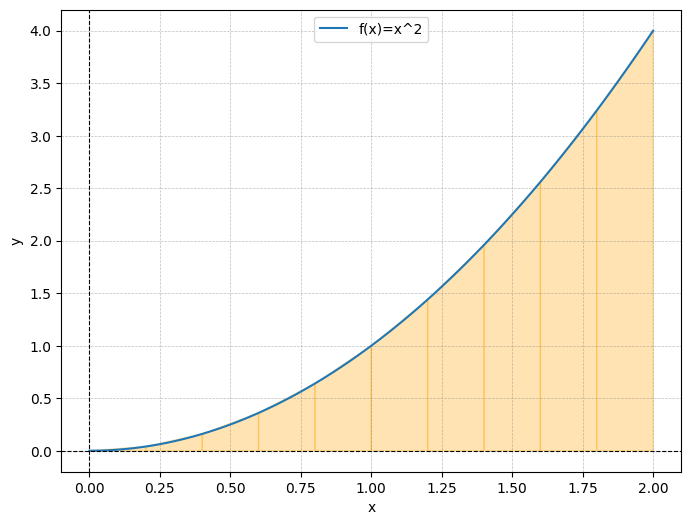

In [8]:
Plottable.multi_plot([f], 0, 2, 100, True, 10, mode = 2)

# Weitere Beispiele

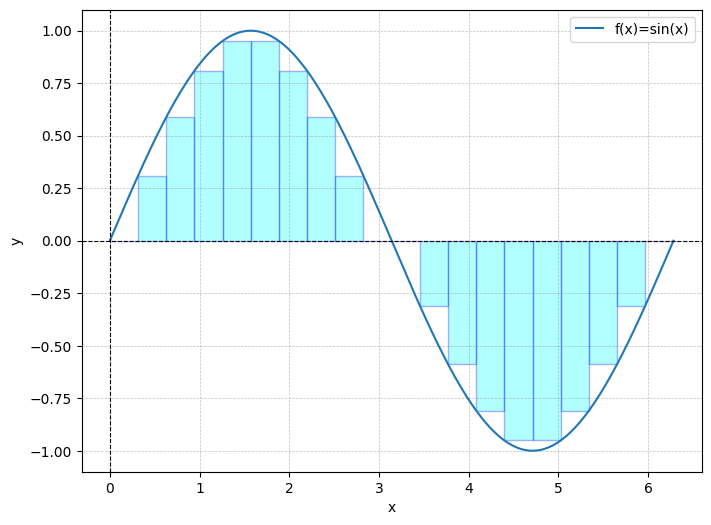

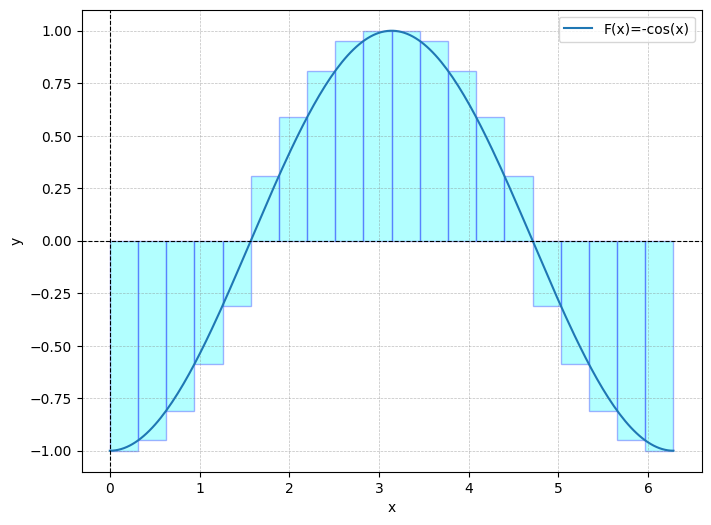

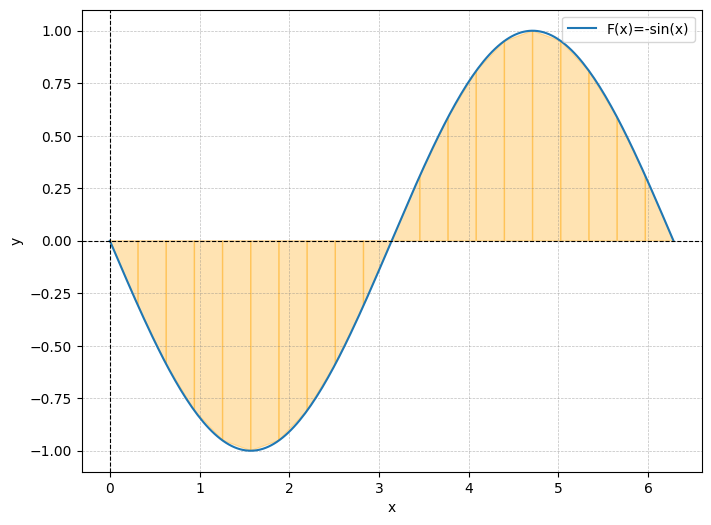

In [9]:
from functions import *
import math

f = SinFunc("f")

Plottable.multi_plot([f], 0, 2*math.pi, 200, True, 20, 0)
Plottable.multi_plot([f.integrate()], 0, 2*math.pi, 200, True, 20, 1)
Plottable.multi_plot([f.integrate().integrate()], 0, 2*math.pi, 200, True, 20, 2)

# Integration mittels Monte-Carlo-Simulation


### Ursprung der Monte-Carlo-Simulation
Die Monte-Carlo-Methode entstand in den 1940er-Jahren im Rahmen des Manhattan-Projekts, um mithilfe von Zufallsprozessen die Wechselwirkungen von Neutronen mit Materie theoretisch zu simulieren – insbesondere beim Durchdringen von Strahlungsabschirmungen. Der Begriff verweist auf das berühmte Kasino in Monte Carlo, da das Verfahren wie beim Roulette auf Zufallszahlen basiert. Schon damals wurden zentrale rechnergestützte Ansätze entwickelt, die bis heute als unverzichtbare Werkzeuge in der numerischen und naturwissenschaftlichen Forschung gelten. [3]

### Anwendung Monte-Carlo-Simulation
- Numerische Lösungen von Integralen (v.a. komplexe Integrale)
- Simulation von dynamischen Prozessen (Wetter, Produktionsabläufe)
- Simulation von Gleichgewischtszuständen (neuronale Netze)
- Statische Untersuchung vn Zufallsverteilungen (erhöhte Genauigkeit der Messfehler bei Experimenten durch häufiges simulieren des Experiments)

<p>MCS wird vor allem bei komplexen Aufgaben, die eigentlich eine hohe Rechenleistung erfordern verwendet</p> [4]

### Einfaches Anwendungsbeispiel: Buffonsches Nadelexperiment
Dieses Experiment dient der Bestimmung von $\pi$. In diesem Experiment werden viele Nadeln (damals Baguettes) geworfen und anschließend gezählt wie viele Nadeln eine Linie berühren und wieviele nicht. Die Wahrscheinlichkeit, dass eine Nadel die Linie kreuzt hängt, durch den Wurf, mit der Rotationssymmetrie der Nadelorientierung von $\pi$ zusammen. 
- $p = \frac{2l}{g\pi} \Rightarrow \pi=\frac{2l}{gp} $
- g ist Abstand der Linien, l ist Länge der Nadeln
[5]

![title](needles.gif) [6]

#### Hit-or-Miss Methode Funktionsprinzip:
- Generierung einer geometrischen Form (meist ein Rechteck) in welchem die Funktion integriert werden soll
- Generierung von zufälligen Punkten innerhalb dieser Form
- Zählen der Punkte die innerhalb der Funktion liegen (Treffer)
- Integral durch das Verhältnis von Treffern zu allen anderen Punkten und der Fläche des Rechtecks geschätzt [7]

#### Hit-or-Miss Methode Nachteile:
- Erfordert viele zufällige Punkte um eine angemessene Genauigkeit zu erzielen [7]


#### Direkte Methode Funktionsprinzip:
- Generierung von zufälligen Punkten innerhalb des Integrationsbereichs
- Berechnung des Funktionswertes an diesen Punkten
- Schätzung des Integrals durch die Summe der Funktionswerte und der mittleren Fläche aller Punkte [7]

### Mathematische Aspekte
- direkt $$\int_{a}^b f(x)\,dx \approx\,(b-a) \cdot \frac{1}{N} \sum_{i=1}^N f(x_i)$$ $$mit\,x_i \in [a,b]\,zufällig\,gezogen$$ [8]
- hit-or-miss $$A = RA \cdot (hits/all\,points)$$ [7]

In [10]:
import numpy as np
from functions import *
# Beispiel-Funktion

f = PowerFunc("f", 1, 2)
print(f)

a, b = 0, 1  # Integrationsgrenzen
N = 100    # Anzahl der Zufallspunkte

xRandom = np.random.uniform(a, b, N)
yRandom = []
for x in xRandom:
    yRandom.append(f(x))

integralEstimate = (b - a) * np.mean(yRandom)
print(f"Monte-Carlo-Schätzwert des Integrals: {integralEstimate}")
print("Lösung durch Stammfunktion: ", f.definite_integral(a, b))

f(x)=x^2
Monte-Carlo-Schätzwert des Integrals: 0.34923934910795323
Lösung durch Stammfunktion:  0.3333333333333333


Integrierte Lösung 0.3333333333333333 der Funktion: f(x)=x^2


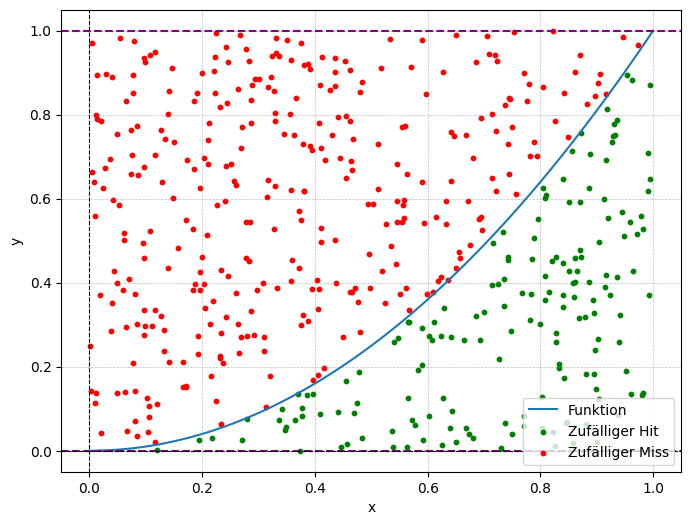

manuale Grenzen y[0, 1]:  0.3340000


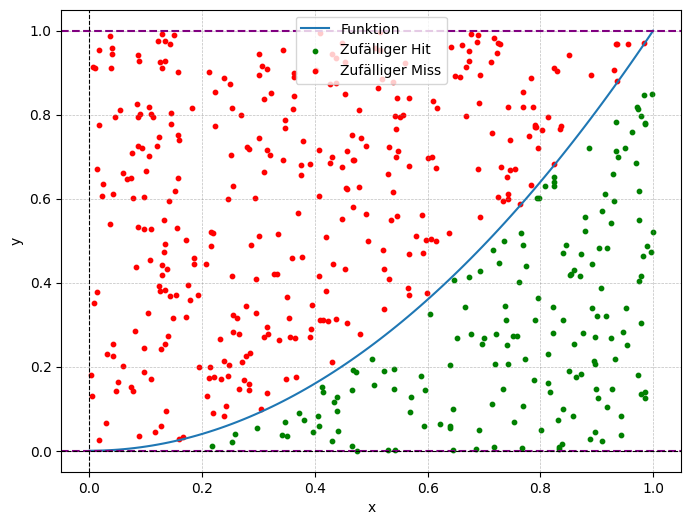

explorative:  0.3338287


Integrierte Lösung 0.0 der Funktion: f_2(x)=x^3


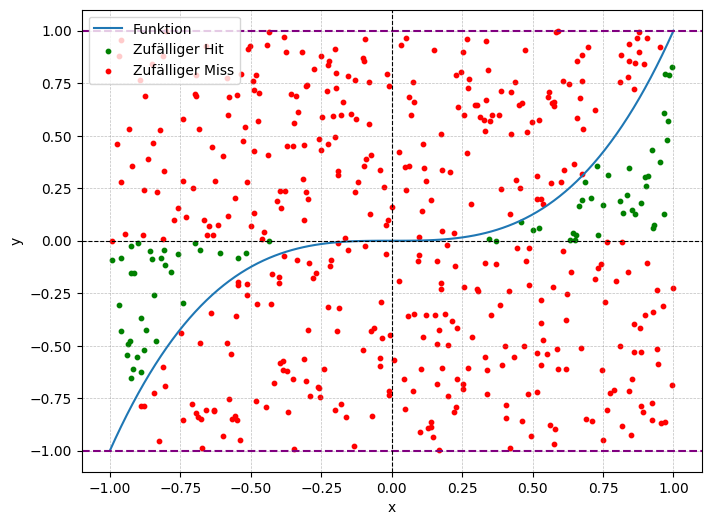

manual Grenzen y[-1, 1]:  0.0320000


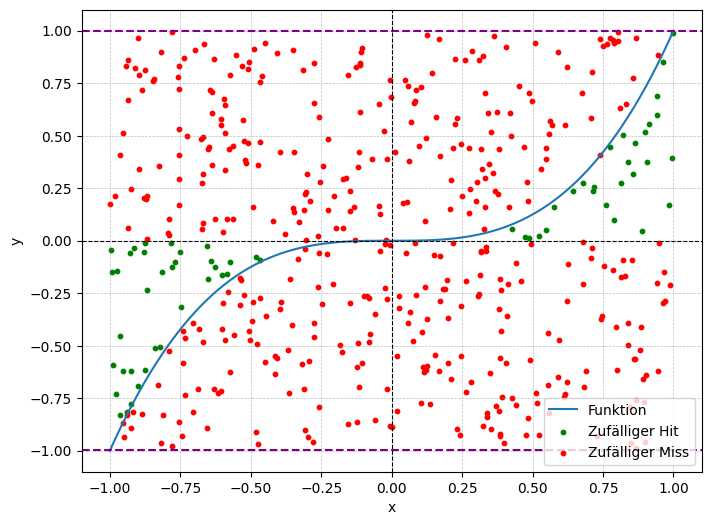

explorative: -0.0558180


Numerische Lösung 1.7247051411056717 der Funktion: f_3(x)=sin(x^-1)


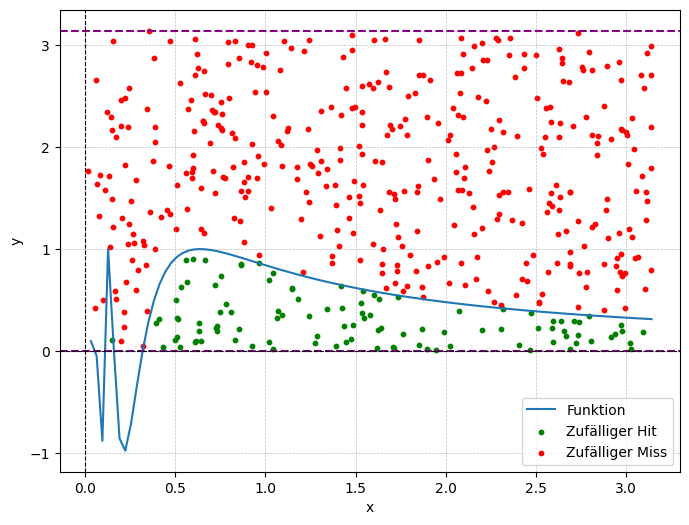

manual Grenzen y[0, pi]:  2.0331385


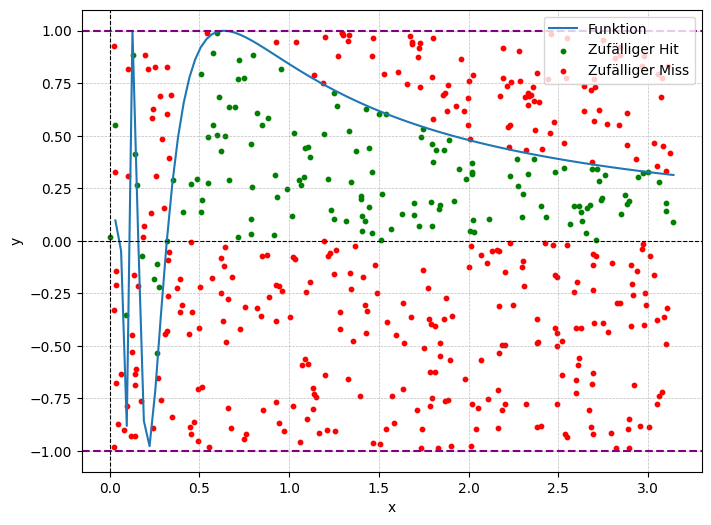

explorative:  1.6461310


Integrierte Lösung 19.085536923187664 der Funktion: f_4(x)=e^x


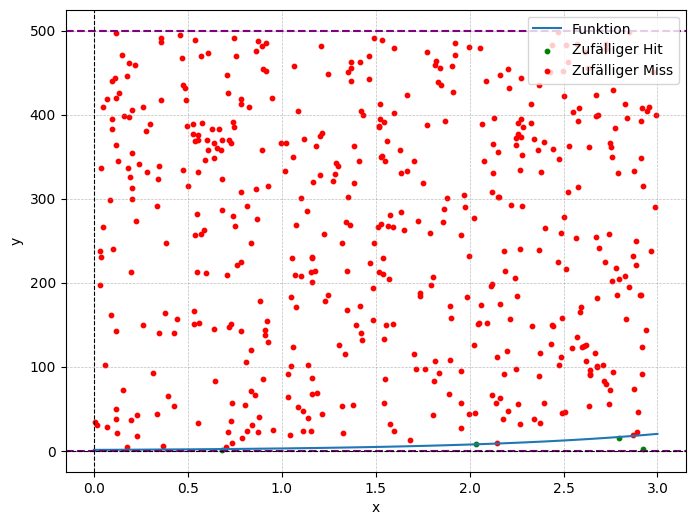

manual Grenzen y[0, 500]:  2.0331385


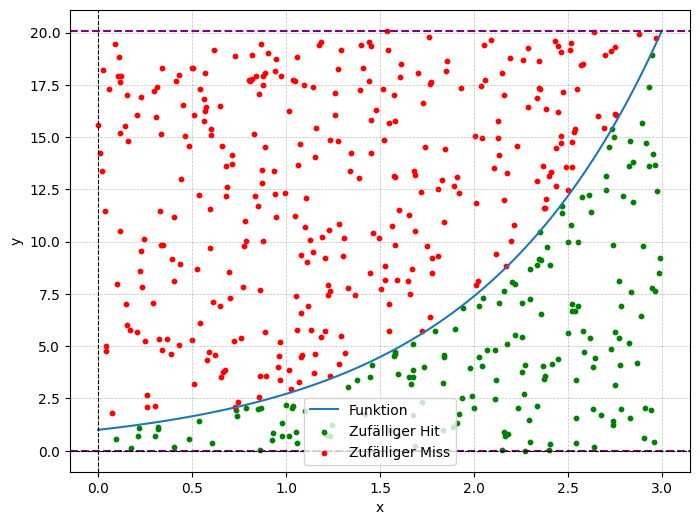

explorative:  21.1948649


In [11]:
import random
import numpy as np
from functions import *

class MCIntegration():
    def __init__(self, function):
        self.f = function

    #estimatig bounds using "random" sampling
    def estimateBounds(self, start, end, samples=1000):
        xs = [random.uniform(start, end) for _ in range(samples)]
        ys = [self.f(x) for x in xs]
        return min(min(ys), 0), max(max(ys), 0)

    def MCSHitOrMiss(self, start, end, numSamples=10000, fMinManual=None, fMaxManual=None):
        if start >= end:
            raise ValueError("start limit must be smaller than end limit")
        
        # defining limits of sampling-area
        if fMinManual is not None and fMaxManual is not None:
            fMin, fMax = fMinManual, fMaxManual
        else:
            fMin, fMax = self.estimateBounds(start, end)

        # defining rectangle
        rectYMin = min(0, fMin)
        rectYMax = max(0, fMax)
        rectArea = (end - start) * (rectYMax - rectYMin)

        hits = 0

        points_hits = []
        points_misses = []

        for _ in range(numSamples):
            x = random.uniform(start, end)
            y = random.uniform(rectYMin, rectYMax)
            f_x = self.f(x)

            # check if dot is under/above the curve
            if f_x >= 0 and 0 <= y <= f_x:
                hits += 1
                points_hits.append((x, y))
            elif f_x < 0 and f_x <= y <= 0:
                hits -= 1  # negativ unter x-Achse
                points_hits.append((x, y))
            else:
                points_misses.append((x, y))

        #print(np.array(points))
        self.f.plot_with_random_points(start, end, fMin, fMax, np.array(points_hits), np.array(points_misses))

        estimatedIntegral = (hits / numSamples) * rectArea
        return estimatedIntegral


sample_size = 500

f = PowerFunc("f", 1, 2)
print("Integrierte Lösung", f.definite_integral(0, 1), "der Funktion:", f)#f.definite_integral(0, 1))

mc = MCIntegration(f)

# manual y-limits
resultManual = mc.MCSHitOrMiss(0, 1, numSamples=sample_size, fMinManual=0, fMaxManual=1)
print(f"manuale Grenzen y[0, 1]: {resultManual: .7f}")

# explorative y-limits
resultAuto = mc.MCSHitOrMiss(0, 1, numSamples=sample_size)
print(f"explorative: {resultAuto: .7f}")

print("\n")

f2 = PowerFunc("f_2", 1, 3)
print("Integrierte Lösung", f2.definite_integral(-1, 1), "der Funktion:", f2)
mc2 = MCIntegration(f2)
resultManual2 = mc2.MCSHitOrMiss(-1, 1, numSamples=sample_size, fMinManual=-1, fMaxManual=1)
print(f"manual Grenzen y[-1, 1]: {resultManual2: .7f}")

resultAuto2 = mc2.MCSHitOrMiss(-1,1, numSamples=sample_size)
print(f"explorative: {resultAuto2: .7f}")

print("\n")

f3 = NestedFunc("f_3", SinFunc(), PowerFunc(exponent=-1))#math.sin(1/x)
print("Numerische Lösung", f3.trapezregel(0, math.pi), "der Funktion:", f3)
mc3 = MCIntegration(f3)
resultManual3 = mc3.MCSHitOrMiss(0, math.pi, numSamples=sample_size, fMinManual=0, fMaxManual=math.pi)
print(f"manual Grenzen y[0, pi]: {resultManual3: .7f}")

resultAuto3 = mc3.MCSHitOrMiss(0, math.pi, numSamples=sample_size)
print(f"explorative: {resultAuto3: .7f}")

print("\n")

f4 = ExpFunc("f_4") #math.e**x
print("Integrierte Lösung", f4.definite_integral(0, 3), "der Funktion:", f4)
mc4 = MCIntegration(f4)

resultManual4 = mc4.MCSHitOrMiss(0, 3, numSamples=sample_size, fMinManual=0, fMaxManual=500)
print(f"manual Grenzen y[0, 500]: {resultManual3: .7f}")

resultAuto4 = mc4.MCSHitOrMiss(0, 3, numSamples=sample_size)
print(f"explorative: {resultAuto4: .7f}")


# Darstellung

Funktionen lassen sich anschaulich als Funktionsgraph im Koordinatensystem darstellen.

Dazu verwenden wir **Plottable** – ein Mixin für aufrufbare Klassen, die in Vorlesung 7 eingeführt wurde.

Diese Vorlage wurde mittlerweile um eine neue und veränderte Funktion ergänzt.

In [12]:
def multi_plot(plottables : [], minimum : float, maximum : float, samples : int = 100, area : bool = False, n : int = 7, mode : int = 0) -> None:
        plt.figure(figsize=(8, 6))
        x = Plottable._get_x_values(minimum, maximum, samples)
        for plottable in plottables:
            y = plottable.sample(minimum, maximum, samples)
            plt.plot(x, y, label=f"{plottable}")

            if area:
                width = (maximum - minimum) / n
                xs = [minimum + i * width for i in range(n + 1)]
                ys = [plottable(xi) for xi in xs]

                if mode == 2: # Trapez
                    for i in range(n):
                        verts = [(xs[i], 0), (xs[i], ys[i]), (xs[i+1], ys[i+1]), (xs[i+1], 0)]
                        plt.gca().add_patch(plt.Polygon(verts, closed=True, alpha=0.3, color='orange'))

                else:
                    for i in range(n):
                        xi = xs[i]
                        if mode == 0:  # Untersumme
                            if abs(ys[i]) <= abs(ys[i+1]):
                                yi = ys[i]
                            else: yi = ys[i+1]
                            #yi = min(ys[i], ys[i+1])
                        elif mode == 1:  # Obersumme
                            if abs(ys[i]) >= abs(ys[i+1]):
                                yi = ys[i]
                            else: yi = ys[i+1]
                            #yi = max(ys[i], ys[i+1])

                        plt.gca().add_patch(plt.Rectangle((xi, 0), width, yi,
                                                        alpha=0.3, edgecolor='blue', facecolor='cyan'))
                        
        Plottable._configure_plot_and_show()

def plot_with_random_points(self, minimum: float, maximum: float, yBorderMin, yBorderMax, points : []) -> None:
        x_vals = Plottable._get_x_values(minimum, maximum, 100)
        y_vals = self.sample(minimum, maximum, 100)

        plt.figure(figsize=(8, 6))
        plt.plot(x_vals, y_vals, label="Funktion")
        
        plt.axhline(y=yBorderMin, color='purple', linestyle='--')
        plt.axhline(y=yBorderMax, color='purple', linestyle='--')

        rand_x = points[:, 0]
        rand_y = points[:, 1]

        plt.scatter(rand_x, rand_y, color='red', s=10, label="Zufälliger Punkt")

        Plottable._configure_plot_and_show()

# Tests

In [13]:
import unittest

class TestIntegration(unittest.TestCase):
    """
    Erweiterte Unittests für numerische Integrationsmethoden.
    """

    def test_polynomial_integration(self):
        poly = PowerFunc("f", 2.0, 2.0)  # f(x) = 2x²
        self.assertAlmostEqual(poly.definite_integral(0, 2), 16/3, places=5)
        self.assertAlmostEqual(poly.untersumme(0, 2, 100), 16/3, delta=0.1)
        self.assertAlmostEqual(poly.obersumme(0, 2, 100), 16/3, delta=0.1)
        self.assertAlmostEqual(poly.trapezregel(0, 2, 100), 16/3, delta=0.01)

    def test_sinus_integration(self):
        sin_func = SinFunc("s", 2.0)  # f(x) = 2sin(x)
        expected = -2 * (math.cos(math.pi) - math.cos(0))  # = 4
        self.assertAlmostEqual(sin_func.definite_integral(0, math.pi), expected, places=5)
        self.assertAlmostEqual(sin_func.trapezregel(0, math.pi, 100), expected, delta=0.05)

    def test_constant_zero_function(self):
        zero_func = ConstFunc("z", 0.0)
        self.assertAlmostEqual(zero_func.definite_integral(-5, 5), 0.0)
        self.assertAlmostEqual(zero_func.trapezregel(-5, 5), 0.0)
        self.assertAlmostEqual(zero_func.obersumme(-5, 5), 0.0)
        self.assertAlmostEqual(zero_func.untersumme(-5, 5), 0.0)

    def test_exponential_integration(self):
        exp_func = ExpFunc("e", 1.0)
        expected = math.exp(1) - 1
        self.assertAlmostEqual(exp_func.definite_integral(0, 1), expected, delta=0.01)
        self.assertAlmostEqual(exp_func.trapezregel(0, 1, 100), expected, delta=0.02)

    def test_negative_interval(self):
        f1 = PowerFunc("f", 1.0, 3.0)  # x³
        val = f1.definite_integral(-1, 1)
        self.assertAlmostEqual(val, 0.0, delta=1e-10)  # ungerade Funktion über symmetrisches Intervall

    def test_piecewise_sum_function(self):
        sfunc = SumFunc("s", [ConstFunc("", 1.0), PowerFunc("", -1.0, 1.0)])  # f(x) = 1 - x
        expected = 0.5  # ∫(1 - x) dx von 0 bis 1 = 1 - 0.5 = 0.5
        self.assertAlmostEqual(sfunc.definite_integral(0, 1), expected, delta=0.01)

class TestNewtonMethod(unittest.TestCase):
    """
    Erweiterte Unittests für die Newton-Methode zur Nullstellenbestimmung.
    """

    def test_linear_function(self):
        linear = PowerFunc("f", 1.0, 1.0)  # f(x) = x
        zeros = linear.newton(-1, 1)
        self.assertTrue(any(abs(z) < 1e-5 for z in zeros))

    def test_quadratic_function_no_real_zeros(self):
        quad = SumFunc("f", [PowerFunc("", 1.0, 2.0), ConstFunc("", 1.0)])  # x² + 1
        zeros = quad.newton(-5, 5)
        self.assertEqual(len(zeros), 0)

    def test_trig_function_multiple_zeros(self):
        sin_func = SinFunc("s", 1.0)
        zeros = sin_func.newton(0, 4 * math.pi)
        self.assertTrue(len(zeros) >= 3)
        self.assertTrue(any(abs(z) - math.pi < 0.1 for z in zeros))

    def test_sin_minus_one_zero(self):
        shifted_sin = SumFunc("f", [SinFunc(), ConstFunc("", -1.0)])  # sin(x) - 1
        zeros = shifted_sin.newton(0, 2 * math.pi)
        self.assertTrue(any(abs(z - math.pi/2) < 0.2 for z in zeros))  # pi/2 ≈ Nullstelle

    def test_nested_function(self):
        inner = PowerFunc("", 1.0, 1.0)
        outer = SinFunc()
        nested = NestedFunc("n", outer, inner)  # sin(x)
        zeros = nested.newton(0, 2 * math.pi)
        self.assertTrue(len(zeros) >= 2)
        self.assertTrue(any(abs(z - math.pi) < 0.1 for z in zeros))

    def test_zero_derivative_handling(self):
        flat = ConstFunc("c", 5.0)
        zeros = flat.newton(-10, 10)
        self.assertEqual(len(zeros), 0)  # keine Nullstelle

    def test_multiple_close_zeros(self):
        func = ProdFunc("p", PowerFunc("", 1.0, 1.0), PowerFunc("", 1.0, 2.0))  # x * x² = x³
        zeros = func.newton(-0.5, 0.5)
        self.assertTrue(len(zeros) >= 1)
        self.assertTrue(any(abs(z) < 1e-3 for z in zeros))

def runIntegrationTests():
    # Integration
    suite = unittest.TestSuite()

    suite.addTest(TestIntegration("test_polynomial_integration"))
    suite.addTest(TestIntegration("test_sinus_integration"))
    suite.addTest(TestIntegration("test_constant_zero_function"))
    suite.addTest(TestIntegration("test_exponential_integration"))
    suite.addTest(TestIntegration("test_negative_interval"))
    suite.addTest(TestIntegration("test_piecewise_sum_function"))
    
    runner = unittest.TextTestRunner()
    runner.run(suite)

def runNewtonTests():
    # Newton
    suite = unittest.TestSuite()

    suite.addTest(TestNewtonMethod("test_linear_function"))
    suite.addTest(TestNewtonMethod("test_quadratic_function_no_real_zeros"))
    suite.addTest(TestNewtonMethod("test_trig_function_multiple_zeros"))
    suite.addTest(TestNewtonMethod("test_sin_minus_one_zero"))
    suite.addTest(TestNewtonMethod("test_nested_function"))
    suite.addTest(TestNewtonMethod("test_zero_derivative_handling"))
    suite.addTest(TestNewtonMethod("test_multiple_close_zeros"))
    
    runner = unittest.TextTestRunner()
    runner.run(suite)

runIntegrationTests()
runNewtonTests()

......
----------------------------------------------------------------------
Ran 6 tests in 0.014s

OK
.......
----------------------------------------------------------------------
Ran 7 tests in 0.020s

OK


Wir haben auch noch weitere Tests in unserer Libary, wie:

* Tests für: ConstFunc, ExpFunc,
* Sinus und Kosinus,
* PowerFunc
* SumFunc
* ProdFunc
* NextedFunc

In [14]:
import functions_tests as ft 

ft.runAllTests()

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK
...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK
......
----------------------------------------------------------------------
Ran 6 tests in 0.005s

OK
....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK
....
----------------------------------------------------------------------
Ran 4 tests in 0.005s

OK
...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK
..E
ERROR: test_03_derive (functions_tests.TestNestedFunc.test_03_derive)
Testet einmalige Ableitung.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "c:\Users\Moritz\Dokumente\Schule\DHBW\sem2\Lab\ScientificProgramming\functions_tests.py", line 422, in test_03_derive
    self.assertTrue(type(fd) is f.ProdFunc)
           

f(x)=sin(x) 

Untersumme Sinus: 1.6693642721504751
Obersumme Sinus:  2.2976828028684335
mit Trapez Sinus: 1.9835235375094546
Vergleich mit Integration: 2.0 



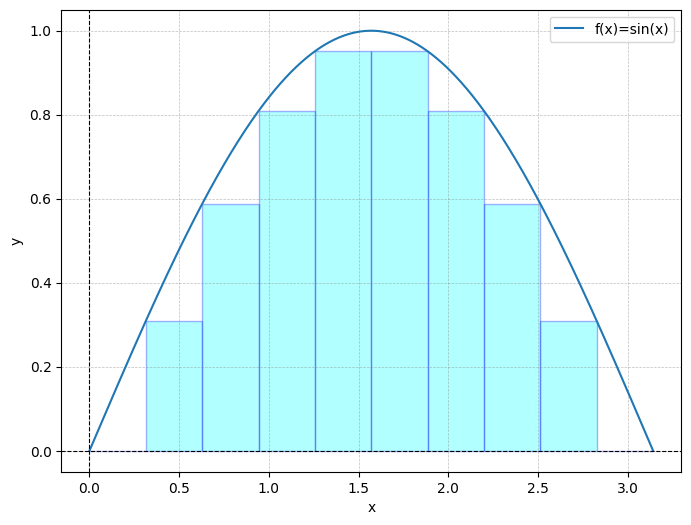

g(x)=(x^2-4x+2) 

Untersumme Polyn.: 22.584000000000003
Obersumme Polyn.:  38.136
mit Trapez Polyn.: 30.359999999999996
Vergleich mit Integration: 30.0 



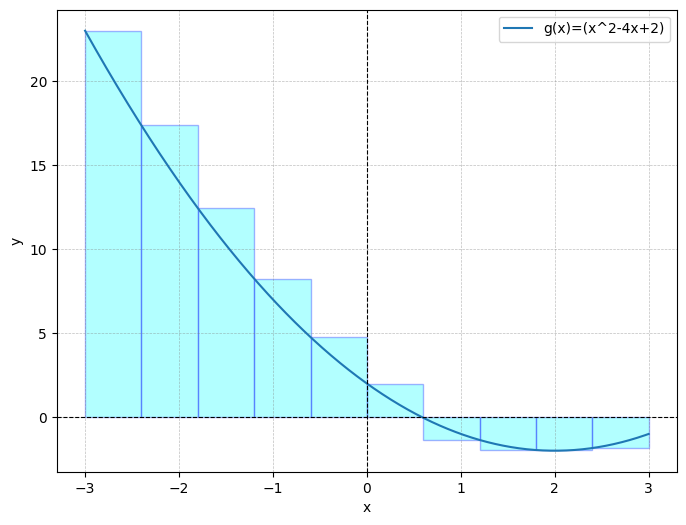

h(x)=e^x 

Untersumme e-Funktion: 12818.308050524598
Obersumme e-Funktion: 34843.7738453313
mit Trapez e-Funktion: 23831.040947927948
Vergleich mit Integration: 22025.465794806703


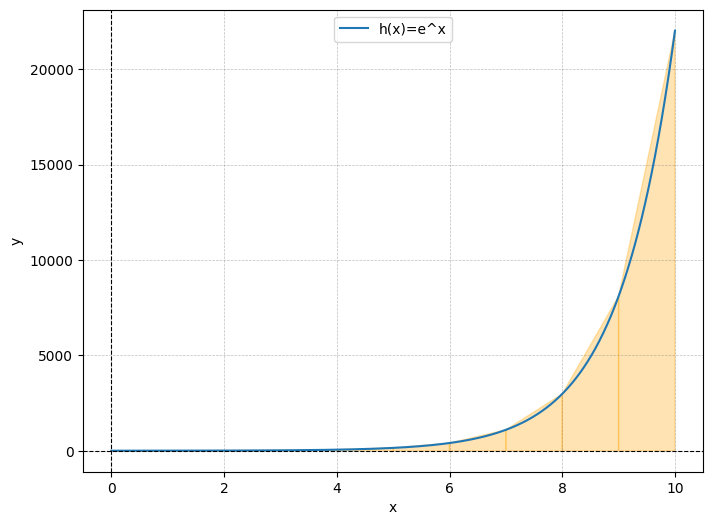

In [15]:
n = 10

f = SinFunc("f")
print(f, "\n")

print("Untersumme Sinus:", f.untersumme(0, math.pi, n))
print("Obersumme Sinus: ",f.obersumme(0, math.pi, n))
print("mit Trapez Sinus:",f.trapezregel(0, math.pi, n))
print("Vergleich mit Integration:", f.definite_integral(0, math.pi), "\n")

Plottable.multi_plot([f], 0, math.pi, 1000, True, n, 0)

g = SumFunc("g", [PowerFunc("", 1, 2), PowerFunc("", -4, 1), ConstFunc("", 2)])
print(g, "\n")

print("Untersumme Polyn.:", g._untersumme(-3, 3, n))
print("Obersumme Polyn.: ", g._obersumme(-3, 3, n))
print("mit Trapez Polyn.:", g._trapezregel(-3, 3, n))
print("Vergleich mit Integration:", g.definite_integral(-3, 3), "\n")
Plottable.multi_plot([g], -3, 3, 1000, True, n, 1)

h = ExpFunc("h")
print(h, "\n")

print("Untersumme e-Funktion:", h._untersumme(0, 10, n))
print("Obersumme e-Funktion:", h._obersumme(0, 10, n))
print("mit Trapez e-Funktion:", h._trapezregel(0, 10, n))
print("Vergleich mit Integration:", h.definite_integral(0, 10))
Plottable.multi_plot([h], 0, 10, 1000, True, n, 2)

# Grenzen

a(x)=sin(50.26548245743669(x+0.03125)) 

Unter, n=2:  1.0
Ober, n=2:   1.0
Trapez, n=2: 1.0 



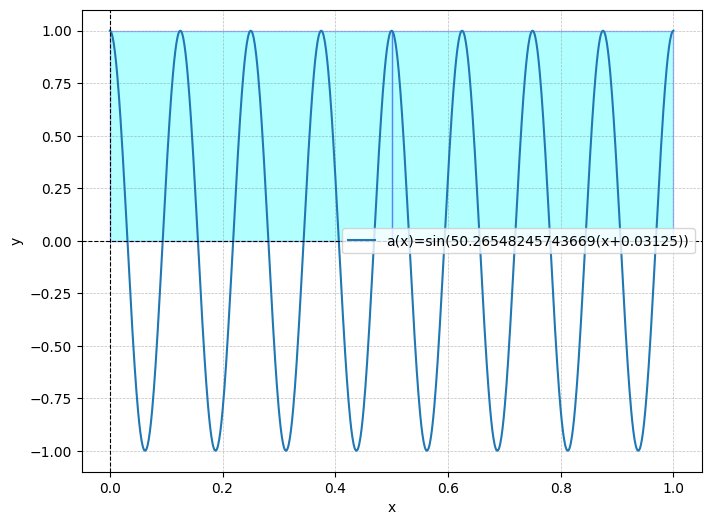

Unter, n=4:  1.0
Ober, n=4:   1.0
Trapez, n=4: 1.0 



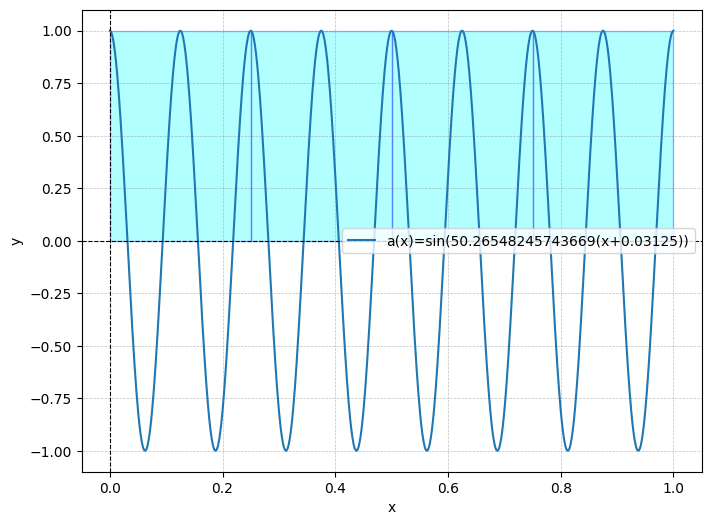

Unter, n=8:  1.0
Ober, n=8:   1.0
Trapez, n=8: 1.0 



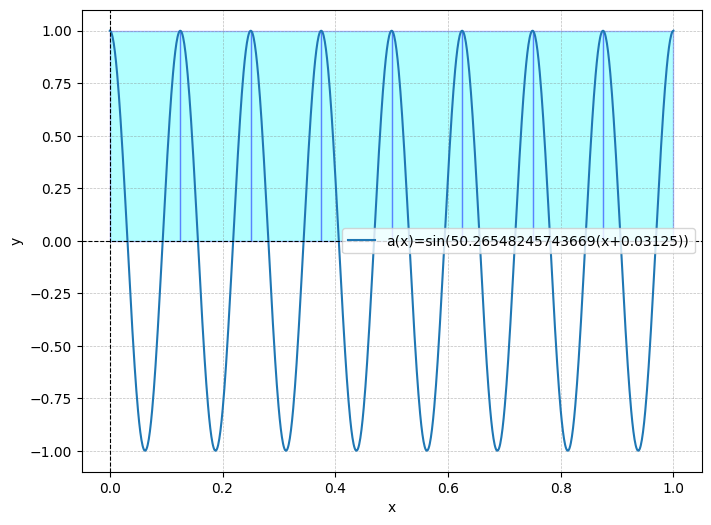

Unter, n=16:  1.0
Ober, n=16:   1.0
Trapez, n=16: 0.0 



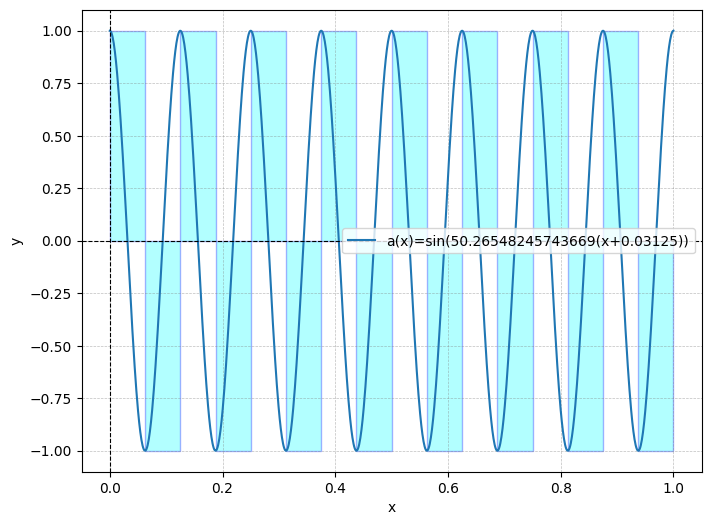

Unter, n=10000:  0.0015999999999997629
Ober, n=10000:   0.0015999999999999118
Trapez, n=10000: 1.39455504435948e-17


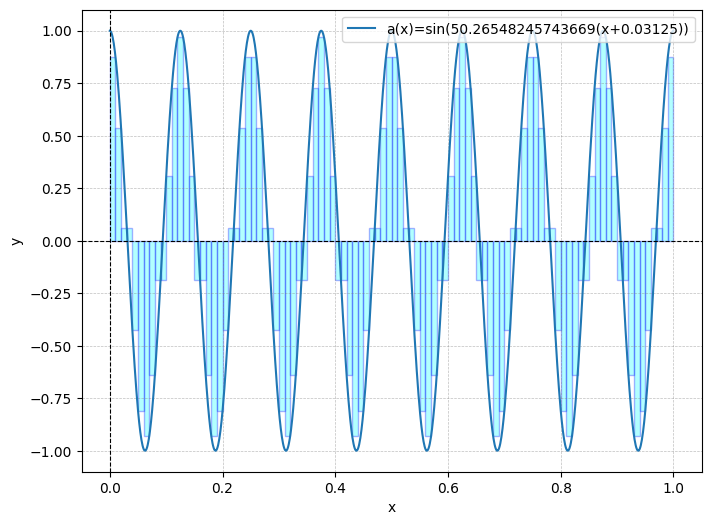

In [16]:
a = NestedFunc("a", SinFunc("", 1, 16*math.pi), SumFunc("", [PowerFunc(), ConstFunc("", 1/32)]))
print(a, "\n")

#Sollte 0 sein
n = 2
print("Unter, n=2: ", a._untersumme(0, 1, n))
print("Ober, n=2:  ", a._obersumme(0, 1, n))
print("Trapez, n=2:", a._trapezregel(0, 1, n), "\n")
Plottable.multi_plot([a], 0, 1, 1000, True, 2, 0)

n = 4
print("Unter, n=4: ", a._untersumme(0, 1, n))
print("Ober, n=4:  ", a._obersumme(0, 1, n))
print("Trapez, n=4:", a._trapezregel(0, 1, n), "\n")
Plottable.multi_plot([a], 0, 1, 1000, True, 4, 0)

n = 8
print("Unter, n=8: ", a._untersumme(0, 1, n))
print("Ober, n=8:  ", a._obersumme(0, 1, n))
print("Trapez, n=8:", a._trapezregel(0, 1, n), "\n")
Plottable.multi_plot([a], 0, 1, 1000, True, 8, 0)

n = 16
print("Unter, n=16: ", a._untersumme(0, 1, n))
print("Ober, n=16:  ", a._obersumme(0, 1, n))
print("Trapez, n=16:", a._trapezregel(0, 1, n), "\n")
Plottable.multi_plot([a], 0, 1, 1000, True, 16, 0)

n = 10000
print(f"Unter, n={n}: ", a._untersumme(0, 1, n))
print(f"Ober, n={n}:  ", a._obersumme(0, 1, n))
print(f"Trapez, n={n}:", a._trapezregel(0, 1, n))
Plottable.multi_plot([a], 0, 1, 1000, True, 100, 0)

# Quellen
<p><a href="https://www.math.ucdavis.edu/~hunter/m125b/ch1.pdf">[1] https://www.math.ucdavis.edu/~hunter/m125b/ch1.pdf</a> (p. 1, entnommen am 10.07)</p>
<p><a href="https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwin3drkm7mOAxUkQvEDHeedPN84FBAWegQIDBAB&url=https%3A%2F%2Fs5c57a7c632aa9cc0.jimcontent.com%2Fdownload%2Fversion%2F1487441273%2Fmodule%2F11417283449%2Fname%2FIntegralrechnung%2520Beweis.pdf&usg=AOvVaw3cbG13gazgDvapFE6sxAR9&opi=89978449">[2] https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwin3drkm7mOAxUkQvEDHeedPN84FBAWegQIDBAB&url=https%3A%2F%2Fs5c57a7c632aa9cc0.jimcontent.com%2Fdownload%2Fversion%2F1487441273%2Fmodule%2F11417283449%2Fname%2FIntegralrechnung%2520Beweis.pdf&usg=AOvVaw3cbG13gazgDvapFE6sxAR9&opi=89978449</a> (p. 1ff, entnommen am 13.07)</p>

<p><a href="https://homepage.univie.ac.at/franz.vesely/oslo_2005/neum_karch_web/sc/sim/sim.pdf">[3] https://homepage.univie.ac.at/franz.vesely/oslo_2005/neum_karch_web/sc/sim/sim.pdf </a>(p. 1, entnommen am 10.07)</p>
<p><a href="https://www.zeuthen.desy.de/~kolanosk/smd_ss08/skripte/mc.pdf">[4] https://www.zeuthen.desy.de/~kolanosk/smd_ss08/skripte/mc.pdf </a>(p. 1, entnommen am 10.07)</p>
<p><a href="https://imsc.uni-graz.at/baur/lehre/WS2013-Seminar/S15.pdf">[5] https://imsc.uni-graz.at/baur/lehre/WS2013-Seminar/S15.pdf </a>(p. 6, entnommen am 10.07)</p>
<p><a href="https://faculty.uml.edu/klevasseur/courses/m419/proj/buffon/buffon.html">[6] https://faculty.uml.edu/klevasseur/courses/m419/proj/buffon/buffon.html </a>(entnommen am 10.07)</p>
<p><a href="https://www.mathematik.tu-clausthal.de/interaktiv/integration/monte-carlo-integration">[7] https://www.mathematik.tu-clausthal.de/interaktiv/integration/monte-carlo-integration </a>(entnommen am 10.07)</p>
<p><a href="https://www.uni-ulm.de/fileadmin/website_uni_ulm/mawi.inst.110/lehre/ws13/Methods_of_Monte_Carlo_Simulation/Monte_Carlo_Methods_-_Lecture_Notes.pdf">[8] https://www.uni-ulm.de/fileadmin/website_uni_ulm/mawi.inst.110/lehre/ws13/Methods_of_Monte_Carlo_Simulation/Monte_Carlo_Methods_-_Lecture_Notes.pdf </a>(entnommen am 13.07)</p>


